# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
dataset = pd.read_csv(r"D:\my analysis project\2.PythonProject\UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
# To find the shape of the dataset

dataset.shape

(1156, 7)

In [4]:

# To understand the data more deeply, we need to know about null value count, datatype and memory requirement of the dataset.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

In [7]:
# Avoiding the SettingWithCopyWarning by using .loc[] method

dataset.loc[:, 'PURPOSE'] = dataset['PURPOSE'].fillna("NOT")

# There are a lot of null values in the PURPOSE column, so we fill them with the 'NOT' keyword.


In [9]:
# Changing the START_DATE and END_DATE to the date_time format so that further it can be use to do analysis.

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], 
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], 
                                     errors='coerce')

In [11]:
from datetime import datetime

# Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

# Ensure the START_DATE column exists
if 'START_DATE' in dataset.columns:
    dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
    dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour
    
    # Changing into categories of day and night
    dataset['day-night'] = pd.cut(x=dataset['time'],
                                  bins=[0, 10, 15, 19, 24],
                                  labels=['Morning', 'Afternoon', 'Evening', 'Night'])
else:
    print("Column 'START_DATE' not found in the dataset.")


In [13]:
# Once we are done with creating new columns, we can now drop rows with null values.

dataset.dropna(inplace=True)

In [14]:
# It is also important to drop the duplicates rows from the dataset. To do that, refer the code below.

dataset.drop_duplicates(inplace=True)

# Data Visualization

In [15]:
# In this section, we will try to understand and compare all columns.

In [16]:
# Let’s start with checking the unique values in dataset of the columns with object datatype.

In [17]:

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
 
unique_values = {}

for col in object_cols:
  unique_values[col] = dataset[col].unique().size

unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

In [18]:
# Now, we will be using matplotlib and seaborn library for countplot the CATEGORY and PURPOSE columns.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180')])

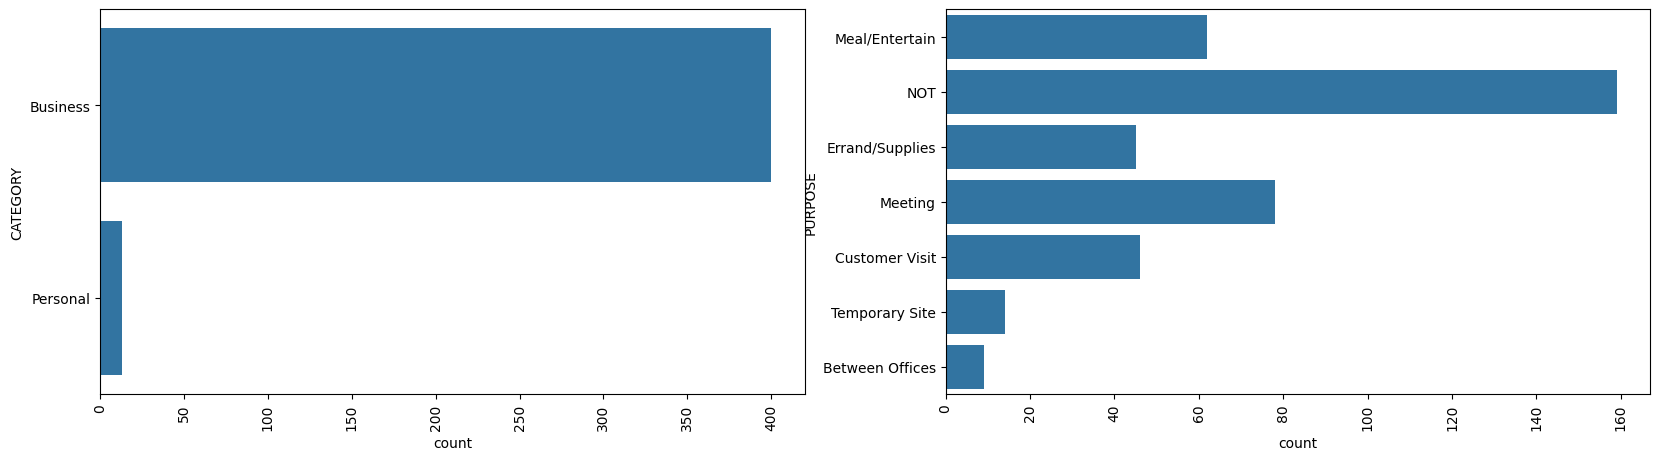

In [32]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=90)

# Insights from the above count-plots : 
### Most of the rides are booked for business purpose.

### Most of the people book cabs for Meetings and Meal / Entertain purpose.

### Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

In [53]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)


<Axes: >

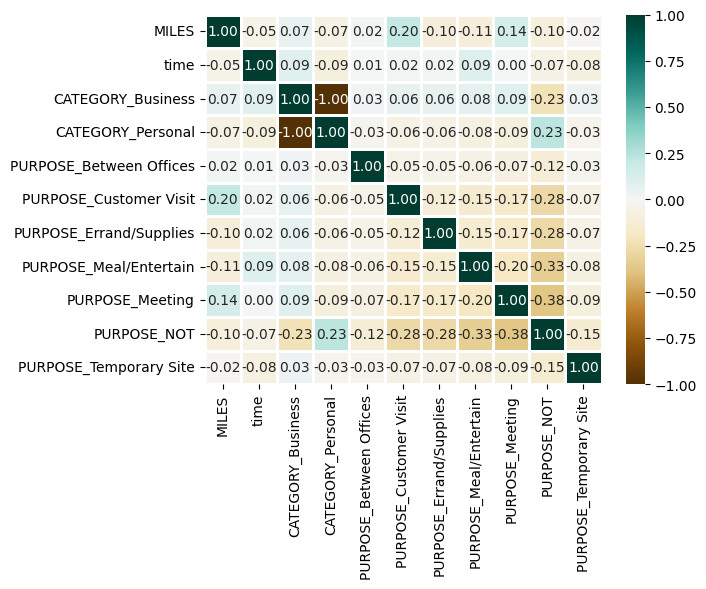

In [54]:
# Select only numerical columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(), 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)

## Insights from the heatmap:
## Business and Personal Category are highly negatively correlated, this have already proven earlier. So this plot, justifies the above conclusions.
## There is not much correlation between the features.

In [37]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)



In [35]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [38]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

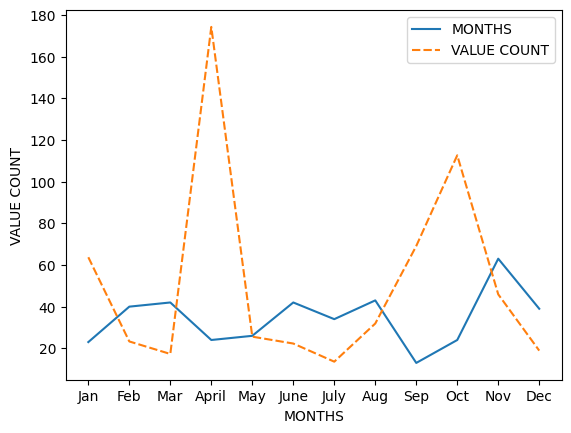

In [39]:
# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

# Insights from the above plot : 
### The counts are very irregular.
### Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.

In [40]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

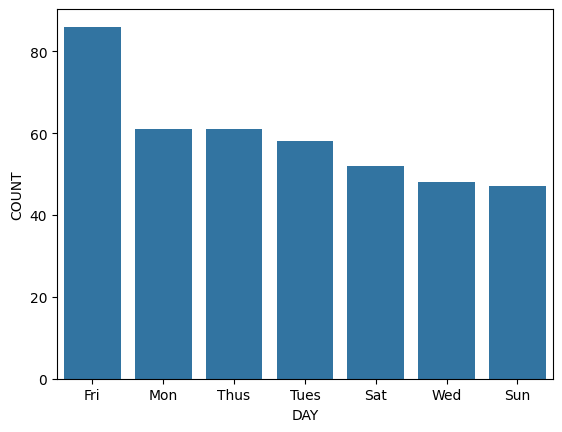

In [43]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

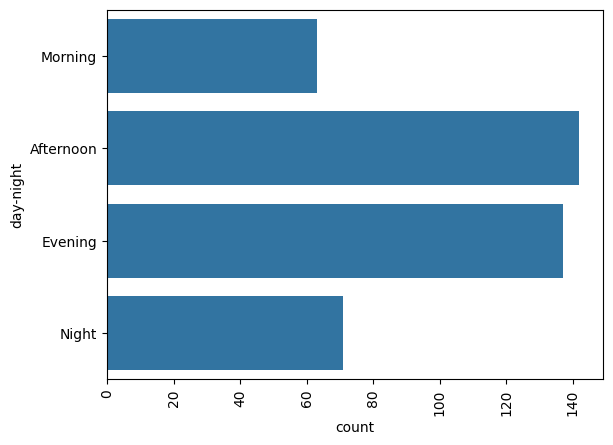

In [33]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)

In [41]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


<Axes: ylabel='MILES'>

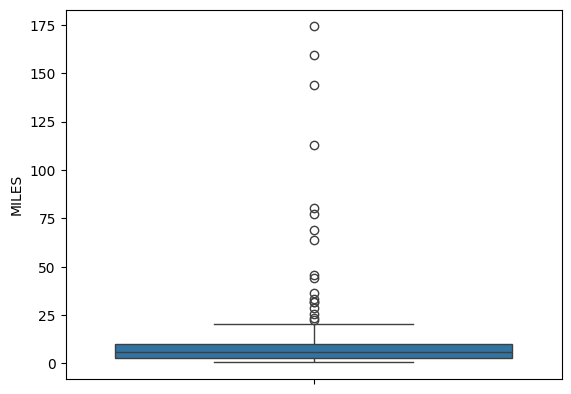

In [44]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

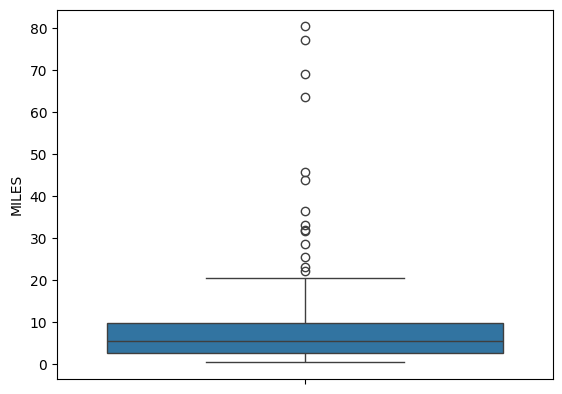

In [45]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

<Axes: ylabel='MILES'>

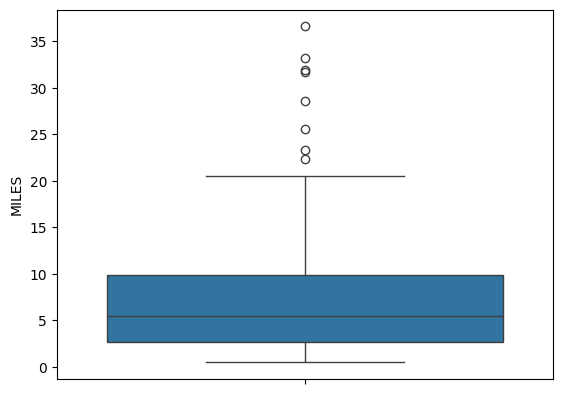

In [47]:
sns.boxplot(dataset[dataset['MILES']<40]['MILES'])

C:\Users\hp\AppData\Local\Temp\ipykernel_21232\1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

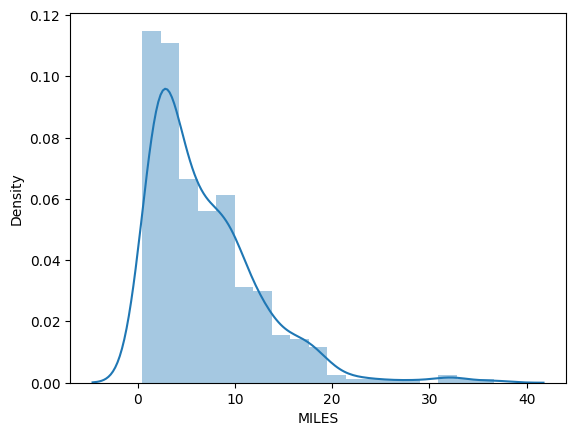

In [51]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

# Insights from the above plots :
#### Most of the cabs booked for the distance of 4-5 miles.
#### Majorly people chooses cabs for the distance of 0-20 miles.
#### For distance more than 20 miles cab counts is nearly negligible.

## Suggestions
- #### **Boost Business Rides: Offer corporate discounts and loyalty rewards.
- #### **Optimize Peak Hours: Increase driver availability from 10 AM–5 PM; use strategic surge pricing.
- #### **Encourage Long Rides: Provide discounts or promos for trips over 20 miles.
- #### **Address Seasonality: Launch winter promotions and weather-based incentives.
- #### **Enhance Short Trips: Introduce micro-ride options for distances under 5 miles.
- #### **Improve Ride Categories: Expand ride options (e.g., premium, shared) and personalize suggestions.

## Conclusion
### The Uber rides analysis reveals:

- ##### Business Focus: Most rides cater to business purposes like meetings and entertainment.
- ##### Peak Hours: High demand occurs from 10 AM–5 PM.
- ##### Short Trips: Majority are under 5 miles, showing a preference for convenience.
- ##### Seasonal Dips: Ride activity declines in winter (Nov–Jan).
- ##### Distinct Categories: Business and personal rides show clear separation.

## Conclusion
### The analysis reveals:

- #### Purpose: Business rides dominate, mainly for meetings and entertainment.
Peak Hours: High demand occurs from 10 AM–5 PM.
Distance: Most rides are short (4–5 miles); long trips are rare.
Seasonal Dips: Ride activity drops in winter (Nov–Jan).
Distinct Categories: Business and personal rides show clear separation.